In [481]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''


"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [483]:
#train = pd.read_csv('/content/drive/MyDrive/Datasets/Data/train_age_dataset.csv')
train = pd.read_csv("./Data/train_age_dataset.csv")
len(train)

488877

In [484]:
test = pd.read_csv("./Data/test_age_dataset.csv")
len(test)

54320

In [485]:
sample = pd.read_csv("./Data/sample_submission.csv")
sample.head()

,prediction
0,1
1,1
2,1
3,1
4,1


## Cleaning

In [486]:
train.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [487]:
test.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
dtype: int64

# WHY ARE THERE NO NULL VALUES

In [488]:
train.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


Oh looks like the null values have been filled with zeros

In [489]:
unnamed = train['Unnamed: 0'].value_counts()
unnamed.value_counts()

1    488877
Name: Unnamed: 0, dtype: int64

Dropping this column, it's redundant

Checking the zero null thing

In [490]:
traintest = pd.concat([train, test])
traintest

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000,1.0
1,405231,51100441,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500,2.0
2,57867,6887426,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000,1.0
3,272618,50742404,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000,1.0
4,251123,45589200,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54315,301257,56503645,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.523364,0.000000,0.000000,0.108411,0.000000,0.000000,0.140187,0.401869,0.000,NaN
54316,39167,39840927,1,1,0.177419,1.666667,2.210526,0,0.0,0.0,...,0.435484,0.000000,0.072581,0.058065,0.000000,0.040323,0.104839,0.290323,140.325,NaN
54317,471826,68398375,2,1,0.048387,0.000000,0.000000,3,0.0,0.0,...,0.935484,0.048387,0.209677,0.158065,0.000000,0.435484,0.048387,0.725806,186.000,NaN
54318,13839,51709440,1,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.177966,0.000000,0.088983,0.000000,0.000000,0.000000,0.000000,0.177966,0.000,NaN


In [491]:
#traintest['followers_actual_avg'] = 30*traintest['followers_avg_age'] - 20
#traintest['following_actual_avg'] = 30*traintest['following_avg_age'] - 20

In [492]:
traintest.groupby(['weekends_trails_watched_per_day']).size()

weekends_trails_watched_per_day
0.000000     255819
0.000313          1
0.000332          1
0.000385          1
0.000413          1
              ...  
10.039683         1
10.144628         1
11.391129         1
13.110294         1
17.201754         1
Length: 21446, dtype: int64

# TODO avgDuration, avgComments, creations, content_views, num_of_comments, weekend, weekday, slots. Others inspected

# TODO multiply slot with weekend and weekday separately (4x2=8)

array([[<AxesSubplot:title={'center':'followers_avg_age'}>]], dtype=object)

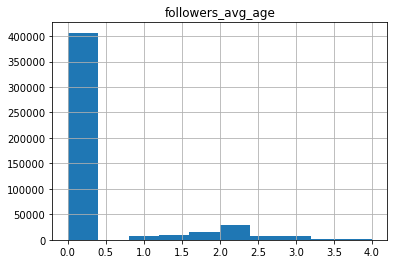

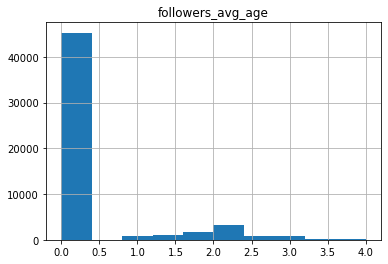

In [493]:
bins = [0.001*i for i in range(1,10000,100)]
train.hist(column='followers_avg_age')
test.hist(column= 'followers_avg_age')

In [494]:
traintest['rep_punc_log'] = np.log(traintest['max_repetitive_punc']+0.000000001)
traintest['hpa_log'] = np.log(traintest['num_of_hashtags_per_action']+0.000000001)
traintest['avgt2_log'] = np.log(traintest['avgt2']+0.000000001) 
traintest['ppa_log'] = np.log(traintest['punctuations_per_action']+0.000000001)
traintest['epa_log'] = np.log(traintest['emoji_count_per_action']+0.000000001)
traintest['wend_mult_log'] = np.log(traintest['punctuations_per_action']*100 + 0.000000001)

### Punctuations per action
ppa_bins = [0,0.0000001,0.01,0.025,0.05,0.1,0.15,0.2,0.4,0.6,0.8,1.0,1.2,1.6,2.0,3.0,4.0,5.0,100.0]
ppa_labels = list(range(len(ppa_bins)-1))
traintest['ppa_binned'] =  pd.cut(traintest['punctuations_per_action'], bins=ppa_bins, labels=ppa_labels)

### Words per action
wpa_bins = [0,0.0000001,1,2,3,4,5,7,10,50,1000]
wpa_labels = [0,1,2,3,4,5,6,7,8,9]
traintest['wpa_binned'] =  pd.cut(traintest['number_of_words_per_action'], bins=wpa_bins, labels=wpa_labels)
traintest['wpa_log'] = np.log(traintest['number_of_words_per_action']+0.000000001)

### Emoji per action
epa_bins = [0,0.0000001,0.005,0.01,0.02,0.04,0.08,0.2,0.4,0.6,0.8,1.0,2.0,3.0]
epa_labels = list(range(len(epa_bins)-1))
traintest['epa_binned'] =  pd.cut(traintest['emoji_count_per_action'], bins=epa_bins, labels=epa_labels)

### Creation to consumption ratio
traintest['create_to_consume'] = np.divide(traintest['creations'], traintest['content_views'])

### Total Watch time
traintest['total_watch_time'] = np.multiply(traintest['avgTimeSpent'], traintest['content_views'])

### SLot*Weekday/end
traintest['s1_wday'] = np.multiply(traintest['slot1_trails_watched_per_day'], traintest['weekdays_trails_watched_per_day'])
traintest['s2_wday'] = np.multiply(traintest['slot2_trails_watched_per_day'], traintest['weekdays_trails_watched_per_day'])
traintest['s3_wday'] = np.multiply(traintest['slot3_trails_watched_per_day'], traintest['weekdays_trails_watched_per_day'])
traintest['s4_wday'] = np.multiply(traintest['slot4_trails_watched_per_day'], traintest['weekdays_trails_watched_per_day'])
traintest['s1_wend'] = np.multiply(traintest['slot1_trails_watched_per_day'], traintest['weekends_trails_watched_per_day'])
traintest['s2_wend'] = np.multiply(traintest['slot2_trails_watched_per_day'], traintest['weekends_trails_watched_per_day'])
traintest['s3_wend'] = np.multiply(traintest['slot3_trails_watched_per_day'], traintest['weekends_trails_watched_per_day'])
traintest['s4_wend'] = np.multiply(traintest['slot4_trails_watched_per_day'], traintest['weekends_trails_watched_per_day'])

### Total = avg*num_comments
traintest['emoji_total'] = traintest['emoji_count_per_action']*traintest['num_of_comments']
traintest['words_total'] = traintest['number_of_words_per_action']*traintest['num_of_comments']
traintest['punc_total'] = traintest['punctuations_per_action']*traintest['num_of_comments']


traintest['avgCompletion_log'] = np.log(np.array(traintest['avgCompletion']).reshape(-1,1)+0.000000001)
traintest['avgTimeSpent_log'] = np.log(np.array(traintest['avgTimeSpent']).reshape(-1,1)+0.000000001)

array([[<AxesSubplot:title={'center':'create_to_consume'}>]], dtype=object)

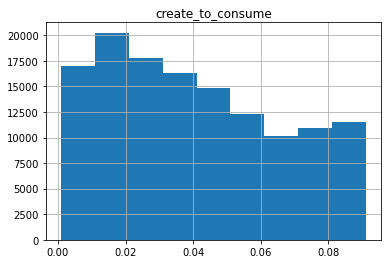

In [495]:
bins = [0.001*i for i in range(1,100,10)]
traintest.hist(column='create_to_consume', bins = bins)

In [496]:
traintest.groupby(['num_of_hashtags_per_action']).size()

num_of_hashtags_per_action
0.000000    541965
0.000119         1
0.000238         1
0.000688         1
0.000920         1
             ...  
1.500000         2
1.666667         1
1.800000         1
2.000000         2
2.333333         3
Length: 444, dtype: int64

In [497]:
traintest.groupby(['num_of_comments']).size()

num_of_comments
0.000000    494006
0.000631         1
0.000639         1
0.000660         1
0.000664         1
             ...  
4.344549         1
4.516279         1
4.575000         1
5.296000         1
8.196850         1
Length: 4089, dtype: int64

In [498]:
traintest['num_hash'] = traintest['num_of_hashtags_per_action']*traintest['num_of_comments']
traintest.groupby(['num_hash']).size()

num_hash
0.000000    542892
0.000001         1
0.000006         1
0.000007         1
0.000013         1
             ...  
0.004571         1
0.005026         1
0.005028         1
0.006053         1
0.015340         1
Length: 303, dtype: int64

In [499]:
traintest['num_hash_rescaled'] = np.round(traintest['num_hash']/0.000001)
traintest.groupby(['num_hash_rescaled']).size()

num_hash_rescaled
0.0        542892
1.0             1
6.0             1
7.0             1
13.0            1
            ...  
4571.0          1
5026.0          1
5028.0          1
6053.0          1
15340.0         1
Length: 249, dtype: int64

In [500]:

def hash_bins(val):
  if val == 0:
    return -1
  elif val<500:
    return 1
  elif val<1500:
    return 2
  else:
    return 3

traintest['hash_binned'] = traintest['num_hash_rescaled'].apply(lambda x: hash_bins(x))
traintest.groupby(['hash_binned']).size()


hash_binned
-1    542892
 1       222
 2        59
 3        24
dtype: int64

In [501]:
traintest.groupby(['following_rate']).size()

following_rate
0.000000      345156
0.000686           1
0.000689           1
0.000704           1
0.000772           2
               ...  
426.504000         1
488.362205         1
563.631147         1
685.277778         1
895.304000         1
Length: 16377, dtype: int64

In [502]:
traintest['Majority Followers'] = np.round(traintest['followers_avg_age'])
traintest['Majority Following'] = np.round(traintest['following_avg_age'])

In [503]:
traintest.groupby(['content_views']).size()

content_views
0.000873     1
0.000883     1
0.000887     1
0.000895     1
0.000909     1
            ..
35.801587    1
37.206349    1
39.966387    1
39.991935    1
75.662281    1
Length: 33941, dtype: int64

In [504]:
bins = pd.IntervalIndex.from_tuples([(0, 0.01), (0.01, 0.1), (0.1, 1), (1,10), (10,100)])
traintest['view_binned'] = pd.cut(train['content_views'], bins = bins)
traintest.groupby(['view_binned']).size()

view_binned
(0.0, 0.01]       45002
(0.01, 0.1]      198281
(0.1, 1.0]       250142
(1.0, 10.0]       49215
(10.0, 100.0]       557
dtype: int64

In [505]:
from sklearn.preprocessing import LabelEncoder
view_le = LabelEncoder()
traintest['view_binned'] = view_le.fit_transform(traintest['view_binned'])
wpa_le = LabelEncoder()
traintest['wpa_binned'] = wpa_le.fit_transform(traintest['wpa_binned'])
epa_le = LabelEncoder()
traintest['epa_binned'] = epa_le.fit_transform(traintest['epa_binned'])
ppa_le = LabelEncoder()
traintest['ppa_binned'] = ppa_le.fit_transform(traintest['ppa_binned'])

traintest.groupby(['view_binned']).size()


view_binned
0     45002
1    198281
2    250142
3     49215
4       557
dtype: int64

In [506]:
traintest.isnull().sum()

Unnamed: 0                             0
userId                                 0
tier                                   0
gender                                 0
following_rate                         0
followers_avg_age                      0
following_avg_age                      0
max_repetitive_punc                    0
num_of_hashtags_per_action             0
emoji_count_per_action                 0
punctuations_per_action                0
number_of_words_per_action             0
avgCompletion                          0
avgTimeSpent                           0
avgDuration                            0
avgComments                            0
creations                              0
content_views                          0
num_of_comments                        0
weekends_trails_watched_per_day        0
weekdays_trails_watched_per_day        0
slot1_trails_watched_per_day           0
slot2_trails_watched_per_day           0
slot3_trails_watched_per_day           0
slot4_trails_wat

In [507]:
#traintest = traintest.drop(['emoji_total','words_total','punc_total','ppa_binned'],axis=1)

In [508]:
print("Hello world")

Hello world


## Model Testing chumma

In [509]:
from sklearn.metrics import f1_score
import lightgbm as lgb

In [510]:
train = traintest[:488877]
test = traintest[488877:]

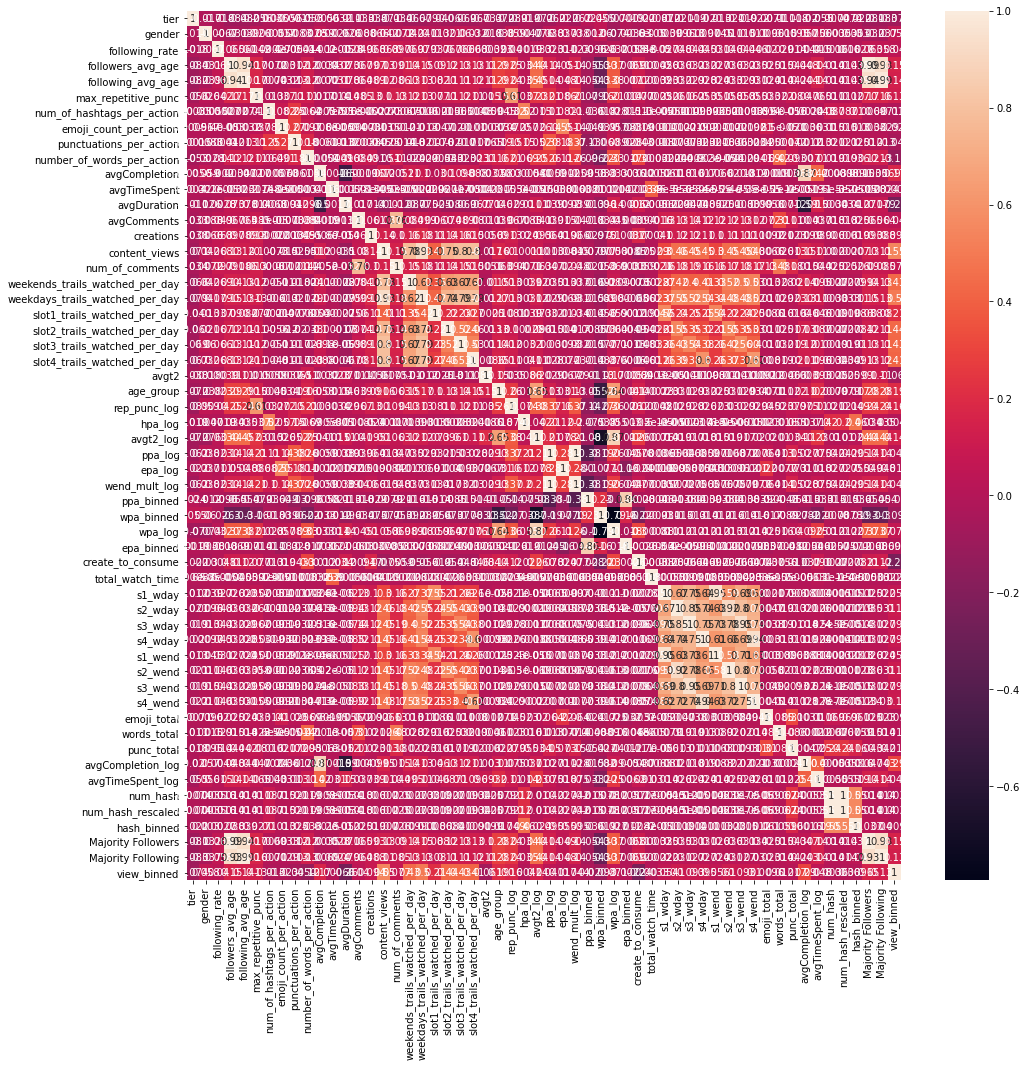

In [511]:
plt.figure(figsize = (16,16))
sns.heatmap(train.drop(['Unnamed: 0', 'userId'], axis = 1).corr(), annot = True)
plt.show()

In [512]:
X = train.drop(['age_group'], axis = 1)
Y = train['age_group']

In [513]:
from sklearn.model_selection import train_test_split
X_Train, X_CV, Y_Train, Y_CV = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [514]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=10000,
                    learning_rate=0.2, n_jobs=-1, objective = 'multiclassova')
xgb.fit(X_Train, Y_Train, early_stopping_rounds = 200, eval_set = [(X_Train, Y_Train), (X_CV, Y_CV)],eval_metric = 'mlogloss', verbose = True)

[0]	validation_0-mlogloss:1.17541	validation_1-mlogloss:1.17485
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 200 rounds.
[1]	validation_0-mlogloss:1.03876	validation_1-mlogloss:1.03801
[2]	validation_0-mlogloss:0.938887	validation_1-mlogloss:0.937427
[3]	validation_0-mlogloss:0.861094	validation_1-mlogloss:0.859234
[4]	validation_0-mlogloss:0.802871	validation_1-mlogloss:0.80114
[5]	validation_0-mlogloss:0.758476	validation_1-mlogloss:0.756572
[6]	validation_0-mlogloss:0.71845	validation_1-mlogloss:0.716144
[7]	validation_0-mlogloss:0.688314	validation_1-mlogloss:0.686084
[8]	validation_0-mlogloss:0.664239	validation_1-mlogloss:0.661852
[9]	validation_0-mlogloss:0.640727	validation_1-mlogloss:0.638403
[10]	validation_0-mlogloss:0.62342	validation_1-mlogloss:0.620846
[11]	validation_0-mlogloss:0.609017	validation_1-mlogloss:0.606721
[12]	validation_0-mlogloss:0.596556	validatio

[121]	validation_0-mlogloss:0.470355	validation_1-mlogloss:0.471954
[122]	validation_0-mlogloss:0.470254	validation_1-mlogloss:0.471882
[123]	validation_0-mlogloss:0.47012	validation_1-mlogloss:0.471783
[124]	validation_0-mlogloss:0.469967	validation_1-mlogloss:0.471656
[125]	validation_0-mlogloss:0.469679	validation_1-mlogloss:0.471408
[126]	validation_0-mlogloss:0.469589	validation_1-mlogloss:0.471347
[127]	validation_0-mlogloss:0.469414	validation_1-mlogloss:0.471197
[128]	validation_0-mlogloss:0.469299	validation_1-mlogloss:0.471116
[129]	validation_0-mlogloss:0.469141	validation_1-mlogloss:0.470972
[130]	validation_0-mlogloss:0.468971	validation_1-mlogloss:0.470804
[131]	validation_0-mlogloss:0.468754	validation_1-mlogloss:0.470644
[132]	validation_0-mlogloss:0.468518	validation_1-mlogloss:0.470463
[133]	validation_0-mlogloss:0.468235	validation_1-mlogloss:0.470172
[134]	validation_0-mlogloss:0.467874	validation_1-mlogloss:0.469826
[135]	validation_0-mlogloss:0.467738	validation_1

[242]	validation_0-mlogloss:0.454668	validation_1-mlogloss:0.460005
[243]	validation_0-mlogloss:0.454602	validation_1-mlogloss:0.459967
[244]	validation_0-mlogloss:0.454515	validation_1-mlogloss:0.459884
[245]	validation_0-mlogloss:0.45443	validation_1-mlogloss:0.459827
[246]	validation_0-mlogloss:0.454344	validation_1-mlogloss:0.459775
[247]	validation_0-mlogloss:0.454241	validation_1-mlogloss:0.459707
[248]	validation_0-mlogloss:0.454099	validation_1-mlogloss:0.459603
[249]	validation_0-mlogloss:0.45404	validation_1-mlogloss:0.459582
[250]	validation_0-mlogloss:0.453908	validation_1-mlogloss:0.459463
[251]	validation_0-mlogloss:0.453718	validation_1-mlogloss:0.459294
[252]	validation_0-mlogloss:0.453446	validation_1-mlogloss:0.459056
[253]	validation_0-mlogloss:0.453285	validation_1-mlogloss:0.458942
[254]	validation_0-mlogloss:0.453153	validation_1-mlogloss:0.458848
[255]	validation_0-mlogloss:0.453126	validation_1-mlogloss:0.45885
[256]	validation_0-mlogloss:0.453075	validation_1-m

[363]	validation_0-mlogloss:0.443221	validation_1-mlogloss:0.452009
[364]	validation_0-mlogloss:0.443102	validation_1-mlogloss:0.451898
[365]	validation_0-mlogloss:0.443012	validation_1-mlogloss:0.451798
[366]	validation_0-mlogloss:0.442939	validation_1-mlogloss:0.451745
[367]	validation_0-mlogloss:0.442843	validation_1-mlogloss:0.45167
[368]	validation_0-mlogloss:0.442758	validation_1-mlogloss:0.451602
[369]	validation_0-mlogloss:0.442717	validation_1-mlogloss:0.451587
[370]	validation_0-mlogloss:0.442682	validation_1-mlogloss:0.451586
[371]	validation_0-mlogloss:0.442636	validation_1-mlogloss:0.451568
[372]	validation_0-mlogloss:0.442582	validation_1-mlogloss:0.451538
[373]	validation_0-mlogloss:0.442414	validation_1-mlogloss:0.451431
[374]	validation_0-mlogloss:0.442271	validation_1-mlogloss:0.451303
[375]	validation_0-mlogloss:0.442232	validation_1-mlogloss:0.451295
[376]	validation_0-mlogloss:0.442188	validation_1-mlogloss:0.45127
[377]	validation_0-mlogloss:0.442118	validation_1-

[484]	validation_0-mlogloss:0.43391	validation_1-mlogloss:0.446069
[485]	validation_0-mlogloss:0.43386	validation_1-mlogloss:0.446035
[486]	validation_0-mlogloss:0.43382	validation_1-mlogloss:0.446048
[487]	validation_0-mlogloss:0.433741	validation_1-mlogloss:0.446002
[488]	validation_0-mlogloss:0.43369	validation_1-mlogloss:0.445964
[489]	validation_0-mlogloss:0.433662	validation_1-mlogloss:0.445962
[490]	validation_0-mlogloss:0.433523	validation_1-mlogloss:0.445856
[491]	validation_0-mlogloss:0.43346	validation_1-mlogloss:0.445835
[492]	validation_0-mlogloss:0.433388	validation_1-mlogloss:0.445814
[493]	validation_0-mlogloss:0.433305	validation_1-mlogloss:0.445764
[494]	validation_0-mlogloss:0.433198	validation_1-mlogloss:0.445693
[495]	validation_0-mlogloss:0.433167	validation_1-mlogloss:0.445688
[496]	validation_0-mlogloss:0.433128	validation_1-mlogloss:0.44568
[497]	validation_0-mlogloss:0.433067	validation_1-mlogloss:0.445651
[498]	validation_0-mlogloss:0.433031	validation_1-mlog

[605]	validation_0-mlogloss:0.426584	validation_1-mlogloss:0.442221
[606]	validation_0-mlogloss:0.426507	validation_1-mlogloss:0.442184
[607]	validation_0-mlogloss:0.426428	validation_1-mlogloss:0.442129
[608]	validation_0-mlogloss:0.426374	validation_1-mlogloss:0.442092
[609]	validation_0-mlogloss:0.426294	validation_1-mlogloss:0.442033
[610]	validation_0-mlogloss:0.426209	validation_1-mlogloss:0.441943
[611]	validation_0-mlogloss:0.426038	validation_1-mlogloss:0.441827
[612]	validation_0-mlogloss:0.425966	validation_1-mlogloss:0.441776
[613]	validation_0-mlogloss:0.425871	validation_1-mlogloss:0.441725
[614]	validation_0-mlogloss:0.425726	validation_1-mlogloss:0.441591
[615]	validation_0-mlogloss:0.425655	validation_1-mlogloss:0.441552
[616]	validation_0-mlogloss:0.425568	validation_1-mlogloss:0.441481
[617]	validation_0-mlogloss:0.425528	validation_1-mlogloss:0.441476
[618]	validation_0-mlogloss:0.425492	validation_1-mlogloss:0.441462
[619]	validation_0-mlogloss:0.425473	validation_

[726]	validation_0-mlogloss:0.419284	validation_1-mlogloss:0.438018
[727]	validation_0-mlogloss:0.419163	validation_1-mlogloss:0.437914
[728]	validation_0-mlogloss:0.419095	validation_1-mlogloss:0.437862
[729]	validation_0-mlogloss:0.419005	validation_1-mlogloss:0.437792
[730]	validation_0-mlogloss:0.418946	validation_1-mlogloss:0.437767
[731]	validation_0-mlogloss:0.418877	validation_1-mlogloss:0.437726
[732]	validation_0-mlogloss:0.418821	validation_1-mlogloss:0.437707
[733]	validation_0-mlogloss:0.418691	validation_1-mlogloss:0.437604
[734]	validation_0-mlogloss:0.418658	validation_1-mlogloss:0.437614
[735]	validation_0-mlogloss:0.418558	validation_1-mlogloss:0.437542
[736]	validation_0-mlogloss:0.418499	validation_1-mlogloss:0.437494
[737]	validation_0-mlogloss:0.418459	validation_1-mlogloss:0.43751
[738]	validation_0-mlogloss:0.418399	validation_1-mlogloss:0.437476
[739]	validation_0-mlogloss:0.418365	validation_1-mlogloss:0.437467
[740]	validation_0-mlogloss:0.418303	validation_1

[847]	validation_0-mlogloss:0.412815	validation_1-mlogloss:0.434791
[848]	validation_0-mlogloss:0.412785	validation_1-mlogloss:0.434799
[849]	validation_0-mlogloss:0.412758	validation_1-mlogloss:0.434794
[850]	validation_0-mlogloss:0.412727	validation_1-mlogloss:0.434804
[851]	validation_0-mlogloss:0.412687	validation_1-mlogloss:0.434779
[852]	validation_0-mlogloss:0.412657	validation_1-mlogloss:0.434771
[853]	validation_0-mlogloss:0.412628	validation_1-mlogloss:0.434776
[854]	validation_0-mlogloss:0.41259	validation_1-mlogloss:0.434772
[855]	validation_0-mlogloss:0.412537	validation_1-mlogloss:0.43473
[856]	validation_0-mlogloss:0.412513	validation_1-mlogloss:0.43473
[857]	validation_0-mlogloss:0.412477	validation_1-mlogloss:0.434714
[858]	validation_0-mlogloss:0.412412	validation_1-mlogloss:0.434692
[859]	validation_0-mlogloss:0.41237	validation_1-mlogloss:0.434667
[860]	validation_0-mlogloss:0.412339	validation_1-mlogloss:0.43466
[861]	validation_0-mlogloss:0.41232	validation_1-mlog

[968]	validation_0-mlogloss:0.407656	validation_1-mlogloss:0.432629
[969]	validation_0-mlogloss:0.407621	validation_1-mlogloss:0.432628
[970]	validation_0-mlogloss:0.407541	validation_1-mlogloss:0.432579
[971]	validation_0-mlogloss:0.407459	validation_1-mlogloss:0.432535
[972]	validation_0-mlogloss:0.407425	validation_1-mlogloss:0.432534
[973]	validation_0-mlogloss:0.407354	validation_1-mlogloss:0.432485
[974]	validation_0-mlogloss:0.407311	validation_1-mlogloss:0.432488
[975]	validation_0-mlogloss:0.407286	validation_1-mlogloss:0.432498
[976]	validation_0-mlogloss:0.407266	validation_1-mlogloss:0.432504
[977]	validation_0-mlogloss:0.407246	validation_1-mlogloss:0.432498
[978]	validation_0-mlogloss:0.407221	validation_1-mlogloss:0.4325
[979]	validation_0-mlogloss:0.407173	validation_1-mlogloss:0.432476
[980]	validation_0-mlogloss:0.407125	validation_1-mlogloss:0.432444
[981]	validation_0-mlogloss:0.407107	validation_1-mlogloss:0.432438
[982]	validation_0-mlogloss:0.407088	validation_1-

[1088]	validation_0-mlogloss:0.403069	validation_1-mlogloss:0.431063
[1089]	validation_0-mlogloss:0.403034	validation_1-mlogloss:0.431066
[1090]	validation_0-mlogloss:0.403009	validation_1-mlogloss:0.431067
[1091]	validation_0-mlogloss:0.402994	validation_1-mlogloss:0.431067
[1092]	validation_0-mlogloss:0.402924	validation_1-mlogloss:0.431018
[1093]	validation_0-mlogloss:0.402848	validation_1-mlogloss:0.430949
[1094]	validation_0-mlogloss:0.402796	validation_1-mlogloss:0.430938
[1095]	validation_0-mlogloss:0.402772	validation_1-mlogloss:0.430928
[1096]	validation_0-mlogloss:0.40273	validation_1-mlogloss:0.430903
[1097]	validation_0-mlogloss:0.402711	validation_1-mlogloss:0.430906
[1098]	validation_0-mlogloss:0.402662	validation_1-mlogloss:0.430881
[1099]	validation_0-mlogloss:0.40263	validation_1-mlogloss:0.430882
[1100]	validation_0-mlogloss:0.402556	validation_1-mlogloss:0.430822
[1101]	validation_0-mlogloss:0.402511	validation_1-mlogloss:0.430834
[1102]	validation_0-mlogloss:0.40248

[1207]	validation_0-mlogloss:0.398332	validation_1-mlogloss:0.429272
[1208]	validation_0-mlogloss:0.398288	validation_1-mlogloss:0.42925
[1209]	validation_0-mlogloss:0.398206	validation_1-mlogloss:0.429197
[1210]	validation_0-mlogloss:0.398176	validation_1-mlogloss:0.429195
[1211]	validation_0-mlogloss:0.39815	validation_1-mlogloss:0.429206
[1212]	validation_0-mlogloss:0.39812	validation_1-mlogloss:0.429206
[1213]	validation_0-mlogloss:0.398093	validation_1-mlogloss:0.429198
[1214]	validation_0-mlogloss:0.398035	validation_1-mlogloss:0.429164
[1215]	validation_0-mlogloss:0.397988	validation_1-mlogloss:0.429143
[1216]	validation_0-mlogloss:0.397916	validation_1-mlogloss:0.429098
[1217]	validation_0-mlogloss:0.397887	validation_1-mlogloss:0.429102
[1218]	validation_0-mlogloss:0.397858	validation_1-mlogloss:0.429096
[1219]	validation_0-mlogloss:0.397819	validation_1-mlogloss:0.429085
[1220]	validation_0-mlogloss:0.397723	validation_1-mlogloss:0.429007
[1221]	validation_0-mlogloss:0.397663

[1327]	validation_0-mlogloss:0.393934	validation_1-mlogloss:0.427906
[1328]	validation_0-mlogloss:0.393897	validation_1-mlogloss:0.427894
[1329]	validation_0-mlogloss:0.393871	validation_1-mlogloss:0.427896
[1330]	validation_0-mlogloss:0.393845	validation_1-mlogloss:0.427896
[1331]	validation_0-mlogloss:0.393802	validation_1-mlogloss:0.42789
[1332]	validation_0-mlogloss:0.393772	validation_1-mlogloss:0.427895
[1333]	validation_0-mlogloss:0.393714	validation_1-mlogloss:0.427864
[1334]	validation_0-mlogloss:0.393694	validation_1-mlogloss:0.42786
[1335]	validation_0-mlogloss:0.393657	validation_1-mlogloss:0.427844
[1336]	validation_0-mlogloss:0.39363	validation_1-mlogloss:0.427852
[1337]	validation_0-mlogloss:0.393608	validation_1-mlogloss:0.427853
[1338]	validation_0-mlogloss:0.39359	validation_1-mlogloss:0.427848
[1339]	validation_0-mlogloss:0.393571	validation_1-mlogloss:0.427855
[1340]	validation_0-mlogloss:0.393547	validation_1-mlogloss:0.427865
[1341]	validation_0-mlogloss:0.393531	

[1447]	validation_0-mlogloss:0.389313	validation_1-mlogloss:0.426049
[1448]	validation_0-mlogloss:0.389253	validation_1-mlogloss:0.42601
[1449]	validation_0-mlogloss:0.38923	validation_1-mlogloss:0.426008
[1450]	validation_0-mlogloss:0.389211	validation_1-mlogloss:0.426005
[1451]	validation_0-mlogloss:0.389176	validation_1-mlogloss:0.42601
[1452]	validation_0-mlogloss:0.38913	validation_1-mlogloss:0.425972
[1453]	validation_0-mlogloss:0.389102	validation_1-mlogloss:0.425965
[1454]	validation_0-mlogloss:0.389087	validation_1-mlogloss:0.425958
[1455]	validation_0-mlogloss:0.389079	validation_1-mlogloss:0.42596
[1456]	validation_0-mlogloss:0.389062	validation_1-mlogloss:0.425959
[1457]	validation_0-mlogloss:0.389046	validation_1-mlogloss:0.425968
[1458]	validation_0-mlogloss:0.389018	validation_1-mlogloss:0.425974
[1459]	validation_0-mlogloss:0.38896	validation_1-mlogloss:0.425928
[1460]	validation_0-mlogloss:0.388897	validation_1-mlogloss:0.425908
[1461]	validation_0-mlogloss:0.388827	va

[1567]	validation_0-mlogloss:0.385074	validation_1-mlogloss:0.424578
[1568]	validation_0-mlogloss:0.385036	validation_1-mlogloss:0.424584
[1569]	validation_0-mlogloss:0.385015	validation_1-mlogloss:0.424595
[1570]	validation_0-mlogloss:0.384991	validation_1-mlogloss:0.424597
[1571]	validation_0-mlogloss:0.384964	validation_1-mlogloss:0.424596
[1572]	validation_0-mlogloss:0.384947	validation_1-mlogloss:0.424598
[1573]	validation_0-mlogloss:0.384929	validation_1-mlogloss:0.424608
[1574]	validation_0-mlogloss:0.384909	validation_1-mlogloss:0.424609
[1575]	validation_0-mlogloss:0.384888	validation_1-mlogloss:0.424615
[1576]	validation_0-mlogloss:0.38486	validation_1-mlogloss:0.424611
[1577]	validation_0-mlogloss:0.384834	validation_1-mlogloss:0.424619
[1578]	validation_0-mlogloss:0.384814	validation_1-mlogloss:0.424615
[1579]	validation_0-mlogloss:0.384802	validation_1-mlogloss:0.424623
[1580]	validation_0-mlogloss:0.384763	validation_1-mlogloss:0.424597
[1581]	validation_0-mlogloss:0.3847

[1687]	validation_0-mlogloss:0.38127	validation_1-mlogloss:0.423636
[1688]	validation_0-mlogloss:0.381248	validation_1-mlogloss:0.423638
[1689]	validation_0-mlogloss:0.381222	validation_1-mlogloss:0.423633
[1690]	validation_0-mlogloss:0.381197	validation_1-mlogloss:0.423636
[1691]	validation_0-mlogloss:0.381178	validation_1-mlogloss:0.423632
[1692]	validation_0-mlogloss:0.381158	validation_1-mlogloss:0.423634
[1693]	validation_0-mlogloss:0.38113	validation_1-mlogloss:0.423628
[1694]	validation_0-mlogloss:0.38111	validation_1-mlogloss:0.423631
[1695]	validation_0-mlogloss:0.381092	validation_1-mlogloss:0.423631
[1696]	validation_0-mlogloss:0.381074	validation_1-mlogloss:0.423633
[1697]	validation_0-mlogloss:0.381045	validation_1-mlogloss:0.423629
[1698]	validation_0-mlogloss:0.381017	validation_1-mlogloss:0.423626
[1699]	validation_0-mlogloss:0.380992	validation_1-mlogloss:0.423629
[1700]	validation_0-mlogloss:0.380975	validation_1-mlogloss:0.423628
[1701]	validation_0-mlogloss:0.380921

[1807]	validation_0-mlogloss:0.377694	validation_1-mlogloss:0.422858
[1808]	validation_0-mlogloss:0.377645	validation_1-mlogloss:0.422816
[1809]	validation_0-mlogloss:0.377623	validation_1-mlogloss:0.422816
[1810]	validation_0-mlogloss:0.377597	validation_1-mlogloss:0.422814
[1811]	validation_0-mlogloss:0.377566	validation_1-mlogloss:0.422811
[1812]	validation_0-mlogloss:0.377542	validation_1-mlogloss:0.422822
[1813]	validation_0-mlogloss:0.3775	validation_1-mlogloss:0.422793
[1814]	validation_0-mlogloss:0.377467	validation_1-mlogloss:0.42281
[1815]	validation_0-mlogloss:0.377436	validation_1-mlogloss:0.422808
[1816]	validation_0-mlogloss:0.377402	validation_1-mlogloss:0.422828
[1817]	validation_0-mlogloss:0.377377	validation_1-mlogloss:0.422831
[1818]	validation_0-mlogloss:0.377357	validation_1-mlogloss:0.422839
[1819]	validation_0-mlogloss:0.377339	validation_1-mlogloss:0.422818
[1820]	validation_0-mlogloss:0.377307	validation_1-mlogloss:0.422799
[1821]	validation_0-mlogloss:0.377266

[1927]	validation_0-mlogloss:0.373826	validation_1-mlogloss:0.421675
[1928]	validation_0-mlogloss:0.373785	validation_1-mlogloss:0.421667
[1929]	validation_0-mlogloss:0.373737	validation_1-mlogloss:0.421664
[1930]	validation_0-mlogloss:0.373675	validation_1-mlogloss:0.421631
[1931]	validation_0-mlogloss:0.373651	validation_1-mlogloss:0.421634
[1932]	validation_0-mlogloss:0.373599	validation_1-mlogloss:0.421585
[1933]	validation_0-mlogloss:0.373557	validation_1-mlogloss:0.421554
[1934]	validation_0-mlogloss:0.373534	validation_1-mlogloss:0.421565
[1935]	validation_0-mlogloss:0.373501	validation_1-mlogloss:0.421548
[1936]	validation_0-mlogloss:0.373475	validation_1-mlogloss:0.421549
[1937]	validation_0-mlogloss:0.373452	validation_1-mlogloss:0.42155
[1938]	validation_0-mlogloss:0.373432	validation_1-mlogloss:0.42155
[1939]	validation_0-mlogloss:0.373386	validation_1-mlogloss:0.421525
[1940]	validation_0-mlogloss:0.373361	validation_1-mlogloss:0.421532
[1941]	validation_0-mlogloss:0.37333

[2047]	validation_0-mlogloss:0.370066	validation_1-mlogloss:0.420653
[2048]	validation_0-mlogloss:0.370036	validation_1-mlogloss:0.420663
[2049]	validation_0-mlogloss:0.37001	validation_1-mlogloss:0.420667
[2050]	validation_0-mlogloss:0.369989	validation_1-mlogloss:0.420668
[2051]	validation_0-mlogloss:0.369966	validation_1-mlogloss:0.420663
[2052]	validation_0-mlogloss:0.369941	validation_1-mlogloss:0.420658
[2053]	validation_0-mlogloss:0.369921	validation_1-mlogloss:0.420651
[2054]	validation_0-mlogloss:0.36989	validation_1-mlogloss:0.420654
[2055]	validation_0-mlogloss:0.369841	validation_1-mlogloss:0.420625
[2056]	validation_0-mlogloss:0.369831	validation_1-mlogloss:0.420628
[2057]	validation_0-mlogloss:0.369815	validation_1-mlogloss:0.420631
[2058]	validation_0-mlogloss:0.369783	validation_1-mlogloss:0.420624
[2059]	validation_0-mlogloss:0.369764	validation_1-mlogloss:0.420623
[2060]	validation_0-mlogloss:0.369745	validation_1-mlogloss:0.420632
[2061]	validation_0-mlogloss:0.36971

[2167]	validation_0-mlogloss:0.366735	validation_1-mlogloss:0.419821
[2168]	validation_0-mlogloss:0.366714	validation_1-mlogloss:0.419819
[2169]	validation_0-mlogloss:0.366688	validation_1-mlogloss:0.41982
[2170]	validation_0-mlogloss:0.366669	validation_1-mlogloss:0.419828
[2171]	validation_0-mlogloss:0.366632	validation_1-mlogloss:0.4198
[2172]	validation_0-mlogloss:0.366611	validation_1-mlogloss:0.419801
[2173]	validation_0-mlogloss:0.366591	validation_1-mlogloss:0.419806
[2174]	validation_0-mlogloss:0.366569	validation_1-mlogloss:0.419813
[2175]	validation_0-mlogloss:0.366544	validation_1-mlogloss:0.41982
[2176]	validation_0-mlogloss:0.36652	validation_1-mlogloss:0.419826
[2177]	validation_0-mlogloss:0.3665	validation_1-mlogloss:0.41983
[2178]	validation_0-mlogloss:0.36648	validation_1-mlogloss:0.419829
[2179]	validation_0-mlogloss:0.366458	validation_1-mlogloss:0.41984
[2180]	validation_0-mlogloss:0.366421	validation_1-mlogloss:0.419823
[2181]	validation_0-mlogloss:0.366399	valida

[2287]	validation_0-mlogloss:0.363438	validation_1-mlogloss:0.419247
[2288]	validation_0-mlogloss:0.363418	validation_1-mlogloss:0.41925
[2289]	validation_0-mlogloss:0.363402	validation_1-mlogloss:0.419257
[2290]	validation_0-mlogloss:0.363383	validation_1-mlogloss:0.419268
[2291]	validation_0-mlogloss:0.363366	validation_1-mlogloss:0.419268
[2292]	validation_0-mlogloss:0.363353	validation_1-mlogloss:0.419271
[2293]	validation_0-mlogloss:0.363339	validation_1-mlogloss:0.41928
[2294]	validation_0-mlogloss:0.363319	validation_1-mlogloss:0.419272
[2295]	validation_0-mlogloss:0.36329	validation_1-mlogloss:0.419281
[2296]	validation_0-mlogloss:0.363264	validation_1-mlogloss:0.419291
[2297]	validation_0-mlogloss:0.363247	validation_1-mlogloss:0.419293
[2298]	validation_0-mlogloss:0.363227	validation_1-mlogloss:0.419302
[2299]	validation_0-mlogloss:0.363202	validation_1-mlogloss:0.419293
[2300]	validation_0-mlogloss:0.363148	validation_1-mlogloss:0.419255
[2301]	validation_0-mlogloss:0.363125

[2407]	validation_0-mlogloss:0.360226	validation_1-mlogloss:0.418663
[2408]	validation_0-mlogloss:0.360205	validation_1-mlogloss:0.418671
[2409]	validation_0-mlogloss:0.360186	validation_1-mlogloss:0.418679
[2410]	validation_0-mlogloss:0.360162	validation_1-mlogloss:0.418685
[2411]	validation_0-mlogloss:0.36014	validation_1-mlogloss:0.418681
[2412]	validation_0-mlogloss:0.360119	validation_1-mlogloss:0.418678
[2413]	validation_0-mlogloss:0.360094	validation_1-mlogloss:0.418676
[2414]	validation_0-mlogloss:0.36008	validation_1-mlogloss:0.418682
[2415]	validation_0-mlogloss:0.360065	validation_1-mlogloss:0.418692
[2416]	validation_0-mlogloss:0.360044	validation_1-mlogloss:0.418686
[2417]	validation_0-mlogloss:0.360025	validation_1-mlogloss:0.418691
[2418]	validation_0-mlogloss:0.360006	validation_1-mlogloss:0.418685
[2419]	validation_0-mlogloss:0.359986	validation_1-mlogloss:0.418683
[2420]	validation_0-mlogloss:0.359954	validation_1-mlogloss:0.418659
[2421]	validation_0-mlogloss:0.35990

[2527]	validation_0-mlogloss:0.357647	validation_1-mlogloss:0.418292
[2528]	validation_0-mlogloss:0.357631	validation_1-mlogloss:0.418295
[2529]	validation_0-mlogloss:0.357603	validation_1-mlogloss:0.418279
[2530]	validation_0-mlogloss:0.357588	validation_1-mlogloss:0.418281
[2531]	validation_0-mlogloss:0.357577	validation_1-mlogloss:0.418283
[2532]	validation_0-mlogloss:0.357558	validation_1-mlogloss:0.418293
[2533]	validation_0-mlogloss:0.357538	validation_1-mlogloss:0.4183
[2534]	validation_0-mlogloss:0.357516	validation_1-mlogloss:0.418298
[2535]	validation_0-mlogloss:0.357504	validation_1-mlogloss:0.418305
[2536]	validation_0-mlogloss:0.357491	validation_1-mlogloss:0.418315
[2537]	validation_0-mlogloss:0.357466	validation_1-mlogloss:0.418312
[2538]	validation_0-mlogloss:0.357452	validation_1-mlogloss:0.418311
[2539]	validation_0-mlogloss:0.357444	validation_1-mlogloss:0.418311
[2540]	validation_0-mlogloss:0.357428	validation_1-mlogloss:0.418314
[2541]	validation_0-mlogloss:0.35741

[2647]	validation_0-mlogloss:0.354582	validation_1-mlogloss:0.417421
[2648]	validation_0-mlogloss:0.354509	validation_1-mlogloss:0.41736
[2649]	validation_0-mlogloss:0.354491	validation_1-mlogloss:0.41737
[2650]	validation_0-mlogloss:0.354469	validation_1-mlogloss:0.417367
[2651]	validation_0-mlogloss:0.354451	validation_1-mlogloss:0.417375
[2652]	validation_0-mlogloss:0.35443	validation_1-mlogloss:0.41738
[2653]	validation_0-mlogloss:0.354415	validation_1-mlogloss:0.417385
[2654]	validation_0-mlogloss:0.354401	validation_1-mlogloss:0.417387
[2655]	validation_0-mlogloss:0.354376	validation_1-mlogloss:0.41739
[2656]	validation_0-mlogloss:0.354356	validation_1-mlogloss:0.417404
[2657]	validation_0-mlogloss:0.354343	validation_1-mlogloss:0.417402
[2658]	validation_0-mlogloss:0.354323	validation_1-mlogloss:0.417405
[2659]	validation_0-mlogloss:0.3543	validation_1-mlogloss:0.417413
[2660]	validation_0-mlogloss:0.354263	validation_1-mlogloss:0.417399
[2661]	validation_0-mlogloss:0.354241	val

[2767]	validation_0-mlogloss:0.35225	validation_1-mlogloss:0.41736
[2768]	validation_0-mlogloss:0.352232	validation_1-mlogloss:0.417369
[2769]	validation_0-mlogloss:0.352218	validation_1-mlogloss:0.417361
[2770]	validation_0-mlogloss:0.352197	validation_1-mlogloss:0.417368
[2771]	validation_0-mlogloss:0.352173	validation_1-mlogloss:0.41737
[2772]	validation_0-mlogloss:0.352153	validation_1-mlogloss:0.417364
[2773]	validation_0-mlogloss:0.352139	validation_1-mlogloss:0.417362
[2774]	validation_0-mlogloss:0.352123	validation_1-mlogloss:0.417367
[2775]	validation_0-mlogloss:0.352108	validation_1-mlogloss:0.417368
[2776]	validation_0-mlogloss:0.352077	validation_1-mlogloss:0.417354
[2777]	validation_0-mlogloss:0.352058	validation_1-mlogloss:0.417356
[2778]	validation_0-mlogloss:0.352046	validation_1-mlogloss:0.417358
[2779]	validation_0-mlogloss:0.35203	validation_1-mlogloss:0.417367
[2780]	validation_0-mlogloss:0.352016	validation_1-mlogloss:0.417368
[2781]	validation_0-mlogloss:0.351979	

[2887]	validation_0-mlogloss:0.3499	validation_1-mlogloss:0.417148
[2888]	validation_0-mlogloss:0.349887	validation_1-mlogloss:0.417151
[2889]	validation_0-mlogloss:0.349868	validation_1-mlogloss:0.417146
[2890]	validation_0-mlogloss:0.349849	validation_1-mlogloss:0.417133
[2891]	validation_0-mlogloss:0.349836	validation_1-mlogloss:0.417129
[2892]	validation_0-mlogloss:0.349791	validation_1-mlogloss:0.417089
[2893]	validation_0-mlogloss:0.349774	validation_1-mlogloss:0.417084
[2894]	validation_0-mlogloss:0.349757	validation_1-mlogloss:0.417072
[2895]	validation_0-mlogloss:0.34974	validation_1-mlogloss:0.417062
[2896]	validation_0-mlogloss:0.349725	validation_1-mlogloss:0.417068
[2897]	validation_0-mlogloss:0.349703	validation_1-mlogloss:0.417065
[2898]	validation_0-mlogloss:0.349677	validation_1-mlogloss:0.417062
[2899]	validation_0-mlogloss:0.349628	validation_1-mlogloss:0.417037
[2900]	validation_0-mlogloss:0.349615	validation_1-mlogloss:0.417047
[2901]	validation_0-mlogloss:0.349598

[3007]	validation_0-mlogloss:0.34751	validation_1-mlogloss:0.416845
[3008]	validation_0-mlogloss:0.347494	validation_1-mlogloss:0.416851
[3009]	validation_0-mlogloss:0.347478	validation_1-mlogloss:0.416856
[3010]	validation_0-mlogloss:0.347455	validation_1-mlogloss:0.416843
[3011]	validation_0-mlogloss:0.347435	validation_1-mlogloss:0.416842
[3012]	validation_0-mlogloss:0.347421	validation_1-mlogloss:0.416834
[3013]	validation_0-mlogloss:0.347401	validation_1-mlogloss:0.416834
[3014]	validation_0-mlogloss:0.347388	validation_1-mlogloss:0.416836
[3015]	validation_0-mlogloss:0.347352	validation_1-mlogloss:0.416811
[3016]	validation_0-mlogloss:0.347337	validation_1-mlogloss:0.416804
[3017]	validation_0-mlogloss:0.347324	validation_1-mlogloss:0.416814
[3018]	validation_0-mlogloss:0.347311	validation_1-mlogloss:0.416815
[3019]	validation_0-mlogloss:0.347297	validation_1-mlogloss:0.416824
[3020]	validation_0-mlogloss:0.347272	validation_1-mlogloss:0.416825
[3021]	validation_0-mlogloss:0.3472

[3127]	validation_0-mlogloss:0.345211	validation_1-mlogloss:0.41663
[3128]	validation_0-mlogloss:0.345188	validation_1-mlogloss:0.41663
[3129]	validation_0-mlogloss:0.345175	validation_1-mlogloss:0.41664
[3130]	validation_0-mlogloss:0.345152	validation_1-mlogloss:0.416638
[3131]	validation_0-mlogloss:0.345139	validation_1-mlogloss:0.416633
[3132]	validation_0-mlogloss:0.345128	validation_1-mlogloss:0.41665
[3133]	validation_0-mlogloss:0.345083	validation_1-mlogloss:0.416619
[3134]	validation_0-mlogloss:0.345054	validation_1-mlogloss:0.416604
[3135]	validation_0-mlogloss:0.345032	validation_1-mlogloss:0.416595
[3136]	validation_0-mlogloss:0.344975	validation_1-mlogloss:0.416557
[3137]	validation_0-mlogloss:0.344949	validation_1-mlogloss:0.416546
[3138]	validation_0-mlogloss:0.344934	validation_1-mlogloss:0.416549
[3139]	validation_0-mlogloss:0.344897	validation_1-mlogloss:0.416532
[3140]	validation_0-mlogloss:0.344876	validation_1-mlogloss:0.416534
[3141]	validation_0-mlogloss:0.344848	

[3247]	validation_0-mlogloss:0.342799	validation_1-mlogloss:0.416315
[3248]	validation_0-mlogloss:0.34278	validation_1-mlogloss:0.416324
[3249]	validation_0-mlogloss:0.342765	validation_1-mlogloss:0.416324
[3250]	validation_0-mlogloss:0.34275	validation_1-mlogloss:0.416333
[3251]	validation_0-mlogloss:0.342734	validation_1-mlogloss:0.416344
[3252]	validation_0-mlogloss:0.342716	validation_1-mlogloss:0.416349
[3253]	validation_0-mlogloss:0.342701	validation_1-mlogloss:0.41635
[3254]	validation_0-mlogloss:0.342685	validation_1-mlogloss:0.416349
[3255]	validation_0-mlogloss:0.342672	validation_1-mlogloss:0.416352
[3256]	validation_0-mlogloss:0.342654	validation_1-mlogloss:0.416353
[3257]	validation_0-mlogloss:0.342642	validation_1-mlogloss:0.416354
[3258]	validation_0-mlogloss:0.342627	validation_1-mlogloss:0.416358
[3259]	validation_0-mlogloss:0.342615	validation_1-mlogloss:0.416355
[3260]	validation_0-mlogloss:0.342602	validation_1-mlogloss:0.416365
[3261]	validation_0-mlogloss:0.342536

[3367]	validation_0-mlogloss:0.340743	validation_1-mlogloss:0.416241
[3368]	validation_0-mlogloss:0.340725	validation_1-mlogloss:0.416237
[3369]	validation_0-mlogloss:0.340712	validation_1-mlogloss:0.416231
[3370]	validation_0-mlogloss:0.340701	validation_1-mlogloss:0.416227
[3371]	validation_0-mlogloss:0.340686	validation_1-mlogloss:0.41623
[3372]	validation_0-mlogloss:0.340672	validation_1-mlogloss:0.416235
[3373]	validation_0-mlogloss:0.34066	validation_1-mlogloss:0.416243
[3374]	validation_0-mlogloss:0.340648	validation_1-mlogloss:0.416239
[3375]	validation_0-mlogloss:0.340631	validation_1-mlogloss:0.416249
[3376]	validation_0-mlogloss:0.340583	validation_1-mlogloss:0.41621
[3377]	validation_0-mlogloss:0.34057	validation_1-mlogloss:0.416224
[3378]	validation_0-mlogloss:0.340552	validation_1-mlogloss:0.416244
[3379]	validation_0-mlogloss:0.340532	validation_1-mlogloss:0.416242
[3380]	validation_0-mlogloss:0.340511	validation_1-mlogloss:0.416241
[3381]	validation_0-mlogloss:0.340475	

[3487]	validation_0-mlogloss:0.338762	validation_1-mlogloss:0.416054
[3488]	validation_0-mlogloss:0.338744	validation_1-mlogloss:0.41605
[3489]	validation_0-mlogloss:0.338732	validation_1-mlogloss:0.416047
[3490]	validation_0-mlogloss:0.338717	validation_1-mlogloss:0.416055
[3491]	validation_0-mlogloss:0.338702	validation_1-mlogloss:0.416056
[3492]	validation_0-mlogloss:0.338681	validation_1-mlogloss:0.416068
[3493]	validation_0-mlogloss:0.338647	validation_1-mlogloss:0.41606
[3494]	validation_0-mlogloss:0.338633	validation_1-mlogloss:0.416068
[3495]	validation_0-mlogloss:0.338616	validation_1-mlogloss:0.416073
[3496]	validation_0-mlogloss:0.338591	validation_1-mlogloss:0.416062
[3497]	validation_0-mlogloss:0.338577	validation_1-mlogloss:0.416065
[3498]	validation_0-mlogloss:0.338524	validation_1-mlogloss:0.416041
[3499]	validation_0-mlogloss:0.338504	validation_1-mlogloss:0.416036
[3500]	validation_0-mlogloss:0.338489	validation_1-mlogloss:0.416038
[3501]	validation_0-mlogloss:0.33847

[3607]	validation_0-mlogloss:0.336363	validation_1-mlogloss:0.415722
[3608]	validation_0-mlogloss:0.336328	validation_1-mlogloss:0.415695
[3609]	validation_0-mlogloss:0.336312	validation_1-mlogloss:0.415706
[3610]	validation_0-mlogloss:0.336298	validation_1-mlogloss:0.415714
[3611]	validation_0-mlogloss:0.336274	validation_1-mlogloss:0.415708
[3612]	validation_0-mlogloss:0.336259	validation_1-mlogloss:0.415703
[3613]	validation_0-mlogloss:0.336244	validation_1-mlogloss:0.415716
[3614]	validation_0-mlogloss:0.336227	validation_1-mlogloss:0.415732
[3615]	validation_0-mlogloss:0.336218	validation_1-mlogloss:0.415728
[3616]	validation_0-mlogloss:0.336189	validation_1-mlogloss:0.415719
[3617]	validation_0-mlogloss:0.33618	validation_1-mlogloss:0.415726
[3618]	validation_0-mlogloss:0.33617	validation_1-mlogloss:0.41573
[3619]	validation_0-mlogloss:0.336144	validation_1-mlogloss:0.415716
[3620]	validation_0-mlogloss:0.336116	validation_1-mlogloss:0.415711
[3621]	validation_0-mlogloss:0.336098

[3727]	validation_0-mlogloss:0.33415	validation_1-mlogloss:0.41554
[3728]	validation_0-mlogloss:0.334142	validation_1-mlogloss:0.415541
[3729]	validation_0-mlogloss:0.334136	validation_1-mlogloss:0.415544
[3730]	validation_0-mlogloss:0.334127	validation_1-mlogloss:0.41554
[3731]	validation_0-mlogloss:0.334109	validation_1-mlogloss:0.415555
[3732]	validation_0-mlogloss:0.334099	validation_1-mlogloss:0.41555
[3733]	validation_0-mlogloss:0.334085	validation_1-mlogloss:0.415544
[3734]	validation_0-mlogloss:0.334071	validation_1-mlogloss:0.415553
[3735]	validation_0-mlogloss:0.334057	validation_1-mlogloss:0.41556
[3736]	validation_0-mlogloss:0.334041	validation_1-mlogloss:0.415556
[3737]	validation_0-mlogloss:0.334026	validation_1-mlogloss:0.415557
[3738]	validation_0-mlogloss:0.334015	validation_1-mlogloss:0.415564
[3739]	validation_0-mlogloss:0.333999	validation_1-mlogloss:0.415562
[3740]	validation_0-mlogloss:0.333985	validation_1-mlogloss:0.415571
[3741]	validation_0-mlogloss:0.333965	v

[3847]	validation_0-mlogloss:0.332312	validation_1-mlogloss:0.415529
[3848]	validation_0-mlogloss:0.332295	validation_1-mlogloss:0.415545
[3849]	validation_0-mlogloss:0.332279	validation_1-mlogloss:0.415557
[3850]	validation_0-mlogloss:0.332262	validation_1-mlogloss:0.415563
[3851]	validation_0-mlogloss:0.332247	validation_1-mlogloss:0.415572
[3852]	validation_0-mlogloss:0.332232	validation_1-mlogloss:0.415579
[3853]	validation_0-mlogloss:0.332214	validation_1-mlogloss:0.415572
[3854]	validation_0-mlogloss:0.332197	validation_1-mlogloss:0.415571
[3855]	validation_0-mlogloss:0.332177	validation_1-mlogloss:0.415579
[3856]	validation_0-mlogloss:0.332166	validation_1-mlogloss:0.415589
[3857]	validation_0-mlogloss:0.332155	validation_1-mlogloss:0.415589
[3858]	validation_0-mlogloss:0.33214	validation_1-mlogloss:0.4156
[3859]	validation_0-mlogloss:0.332119	validation_1-mlogloss:0.415597
[3860]	validation_0-mlogloss:0.332101	validation_1-mlogloss:0.4156
[3861]	validation_0-mlogloss:0.332088	v

XGBClassifier(learning_rate=0.2, n_estimators=10000, n_jobs=-1,
              objective='multi:softprob')

In [515]:
pred = xgb.predict(X_CV)
print(f1_score(Y_CV, pred, average = 'weighted'))

0.8056519228821898


In [516]:
#lgb_pred = clf.predict_proba(test.drop(['age_group', 'Majority Followers', 'Majority Following', 'view_binned'], axis = 1))
xgb_pred = xgb.predict_proba(test.drop(['age_group'], axis = 1))
#ensemble = (0.77*lgb_pred + 0.7997*xgb_pred)/(0.77 + 0.7997)
test_pred = pd.DataFrame(xgb_pred)
test_pred = test_pred.idxmax(axis = 1) + 1
test_pred.columns = ['prediction']

In [517]:
test_pred.head()

0    1
1    1
2    1
3    3
4    1
dtype: int64

In [518]:
test_pred.to_csv('./Data/Preds/Submission69.csv', index = False, header = True)

In [519]:
import eli5 
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(xgb, random_state=1).fit(X_CV, Y_CV)


In [224]:
eli5.show_weights(perm, feature_names = X_CV.columns.tolist(), top=100)

Weight,Feature
0.2987 ± 0.0035,creations
0.1686 ± 0.0021,userId
0.0150 ± 0.0020,content_views
0.0064 ± 0.0014,avgCompletion
0.0047 ± 0.0008,slot4_trails_watched_per_day
0.0046 ± 0.0004,slot2_trails_watched_per_day
0.0045 ± 0.0018,weekdays_trails_watched_per_day
0.0041 ± 0.0008,avgTimeSpent
0.0037 ± 0.0006,number_of_words_per_action
0.0037 ± 0.0007,followers_avg_age
